<a href="https://colab.research.google.com/github/Light-Danube/ML-2023-local/blob/main/Sokrut_PR_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Глибокий аналіз і візуалізація даних**
# Завдання 1.

Провести аналіз даних. Зробити візуалізацію результатів.
Написати висновки.

In [1]:
### MAKE SURE THAT YOU ARE FOLLOWING STEP BY STEP:
### BY SOKRUT DANYLO V28 FIT 4-12


###Import needed libaries for workout:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
###Load our file into local colab storage:
from google.colab import files
files.upload()

Saving museum_visitors.csv to museum_visitors.csv


{'museum_visitors.csv': b'Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center\n2014-01-01,24778,4486,1581,6602\n2014-02-01,18976,4172,1785,5029\n2014-03-01,25231,7082,3229,8129\n2014-04-01,26989,6756,2129,2824\n2014-05-01,36883,10858,3676,10694\n2014-06-01,29487,5751,2121,11036\n2014-07-01,32378,5406,2239,13490\n2014-08-01,37680,8619,1769,9139\n2014-09-01,28473,61192,1073,5661\n2014-10-01,27995,6488,1979,7356\n2014-11-01,25691,4189,2404,9773\n2014-12-01,18754,4339,1319,7184\n2015-01-01,20438,3858,1823,6250\n2015-02-01,15578,3742,1558,5907\n2015-03-01,21297,5390,2336,9884\n2015-04-01,26670,7000,3057,7254\n2015-05-01,34383,12528,4009,13207\n2015-06-01,30569,5377,2544,11102\n2015-07-01,41242,6111,3057,11072\n2015-08-01,30700,5383,2415,12096\n2015-09-01,20967,5746,1398,6608\n2015-10-01,29764,8882,2237,12524\n2015-11-01,24483,6848,2850,6677\n2015-12-01,21426,4502,2075,5967\n2016-01-01,19659,4377,2150,6587\n2016-02-01,17378,3675,2547,6955\n2016-03-0

In [54]:
#1 1.	Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки.
df = pd.read_csv('/content/museum_visitors.csv')

In [55]:
#2 2.	Вивести перші 5 рядків датасету.
df.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [56]:
#3 3.	Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків).
print("Shape is:", df.shape)

Shape is: (59, 5)


In [57]:
df.dtypes

Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object

In [58]:
df.isnull().sum()

Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64

In [59]:
#4 4.	Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів).

# Шукаємо дублі за допомогою функції .drop_duplicates()
data_no_duplicates = df.drop_duplicates()

# Виводимо розмір датасету після викиду дублікованих даних
print("Size of the table after removing duplicates:", data_no_duplicates.shape)

Size of the table after removing duplicates: (59, 5)


In [60]:
#5 5.	Про які роки містить інформацію датасет.

# Витягнемо рік із стовпця "Date" та створимо новий стовпець "Year"
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Знайдемо унікальні роки у датасеті
unique_years = df['Year'].unique()

# Виведемо унікальні роки
print("Роки, які містить датасет:")
print(unique_years)

Роки, які містить датасет:
[2014 2015 2016 2017 2018]


In [61]:
#6 6.	Змінити назви столбців.
# Замінити великі букви на маленьки, пробіли на підкреслення (date, avila_adobe, firehouse_museum, chinese_american_museum, america_tropical_interpretive_center).

# Виведемо поточні назви стовпців:
print("Поточні назви стовпців:")
print(df.columns)

# Змінимо назви стовпців
df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

# Виведемо оновлені назви стовпців
print("Оновлені назви стовпців:")
print(df.columns)

Поточні назви стовпців:
Index(['Date', 'Avila Adobe', 'Firehouse Museum', 'Chinese American Museum',
       'America Tropical Interpretive Center', 'Year'],
      dtype='object')
Оновлені назви стовпців:
Index(['date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum',
       'america_tropical_interpretive_center', 'year'],
      dtype='object')


In [62]:
#7 7.	Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.

# Обираємо колонку "дата", середнє значення та округлюємо для більш лаконічного результату
avg_visitors = round(df.drop(columns=['date']).mean())
avg_visitors

avila_adobe                             24062.0
firehouse_museum                         6473.0
chinese_american_museum                  2721.0
america_tropical_interpretive_center     7107.0
year                                     2016.0
dtype: float64

In [63]:
#8 8.	Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік

# Розділимо стовпець "Date" на окремі частини
df['Year'] = pd.to_datetime(df['date']).dt.year

# Відфільтруємо дані за 2018 рік
data_2018 = df[df['Year'] == 2018]

# Знайдемо мінімальну та максимальну кількість відвідувачів для кожного музею в 2018 році
min_visitors_2018 = data_2018.min(numeric_only=True)
max_visitors_2018 = data_2018.max(numeric_only=True)

# Виведемо результати
print("Мінімальна кількість відвідувачів для кожного музею в 2018 році:")
print(min_visitors_2018)

print("\nМаксимальна кількість відвідувачів для кожного музею в 2018 році:")
print(max_visitors_2018)


Мінімальна кількість відвідувачів для кожного музею в 2018 році:
avila_adobe                             14718
firehouse_museum                         3306
chinese_american_museum                  2146
america_tropical_interpretive_center     3180
year                                     2018
Year                                     2018
dtype: int64

Максимальна кількість відвідувачів для кожного музею в 2018 році:
avila_adobe                             25173
firehouse_museum                         8013
chinese_american_museum                  4960
america_tropical_interpretive_center     5837
year                                     2018
Year                                     2018
dtype: int64


In [64]:
#9 9.	Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року.
# Вивести назви місяців (не цифри).

# Розділимо стовпець "date" на окремі частини
df['Year'] = pd.to_datetime(df['date']).dt.year
df['Month'] = pd.to_datetime(df['date']).dt.month_name()

# Відфільтруємо дані за 2015 рік
data_2015 = df[df['Year'] == 2015]

# Згрупуємо дані за місяці та знайдемо загальну кількість відвідувачів
monthly_total_visitors = data_2015.groupby('Month').sum(numeric_only=True)

# Знайдемо місяцея з найвищою та найнижчою загальною кількістю відвідувачів
month_with_highest_visitors = monthly_total_visitors.idxmax()[0]
month_with_lowest_visitors = monthly_total_visitors.idxmin()[0]

# Виведемо результати
print("Month with the highest total visitors in 2015:", month_with_highest_visitors)
print("Month with the lowest total visitors in 2015:", month_with_lowest_visitors)

Month with the highest total visitors in 2015: July
Month with the lowest total visitors in 2015: February


In [65]:
#10 10.	Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року

# Розділимо стовпець "date" на окремі частини
df['Year'] = pd.to_datetime(df['date']).dt.year
df['Month'] = pd.to_datetime(df['date']).dt.month_name()

# Відфільтруємо дані за 2018 рік
data_2018 = df[df['Year'] == 2018]

# Визначимо літні і зимові місяці
summer_months = ['June', 'July', 'August']
winter_months = ['December', 'January', 'February']

# Фільтруємо дані для літніх і зимових місяців
summer_data = data_2018[data_2018['Month'].isin(summer_months)]
winter_data = data_2018[data_2018['Month'].isin(winter_months)]

# Знайдемо суму відвідувачів музею "Avila Adobe" для літніх і зимових місяців
summer_visitors = summer_data['avila_adobe'].sum()
winter_visitors = winter_data['avila_adobe'].sum()

# Виведемо результати порівняння
print("Кількість відвідувачів музею 'Avila Adobe' у літні місяці 2018 року:", summer_visitors)
print("Кількість відвідувачів музею 'Avila Adobe' у зимові місяці 2018 року:", winter_visitors)

Кількість відвідувачів музею 'Avila Adobe' у літні місяці 2018 року: 66122
Кількість відвідувачів музею 'Avila Adobe' у зимові місяці 2018 року: 30983


In [66]:
#11 11.	Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році

# Розділимо стовпець "Date" на окремі частини
df['Year'] = pd.to_datetime(df['date']).dt.year

# Відфільтруємо дані за 2016 рік
data_2016 = df[df['Year'] == 2016]

# Видалимо стовпець "Year", оскільки він не потрібен для кореляції
data_2016 = data_2016.drop(columns=['Year'])

# Виберемо стовпці з кількістю відвідувачів в кожному з музеїв
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum','america_tropical_interpretive_center']
museum_data = data_2016[museum_columns]

# Знайдемо кореляцію між кількістю відвідувачів у музеях та датами
correlation_matrix = museum_data.corr()
correlation_matrix


,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
avila_adobe,1.000000,0.737200,0.089054,0.436561
firehouse_museum,0.737200,1.000000,0.553935,0.247389
chinese_american_museum,0.089054,0.553935,1.000000,0.443800
america_tropical_interpretive_center,0.436561,0.247389,0.443800,1.000000


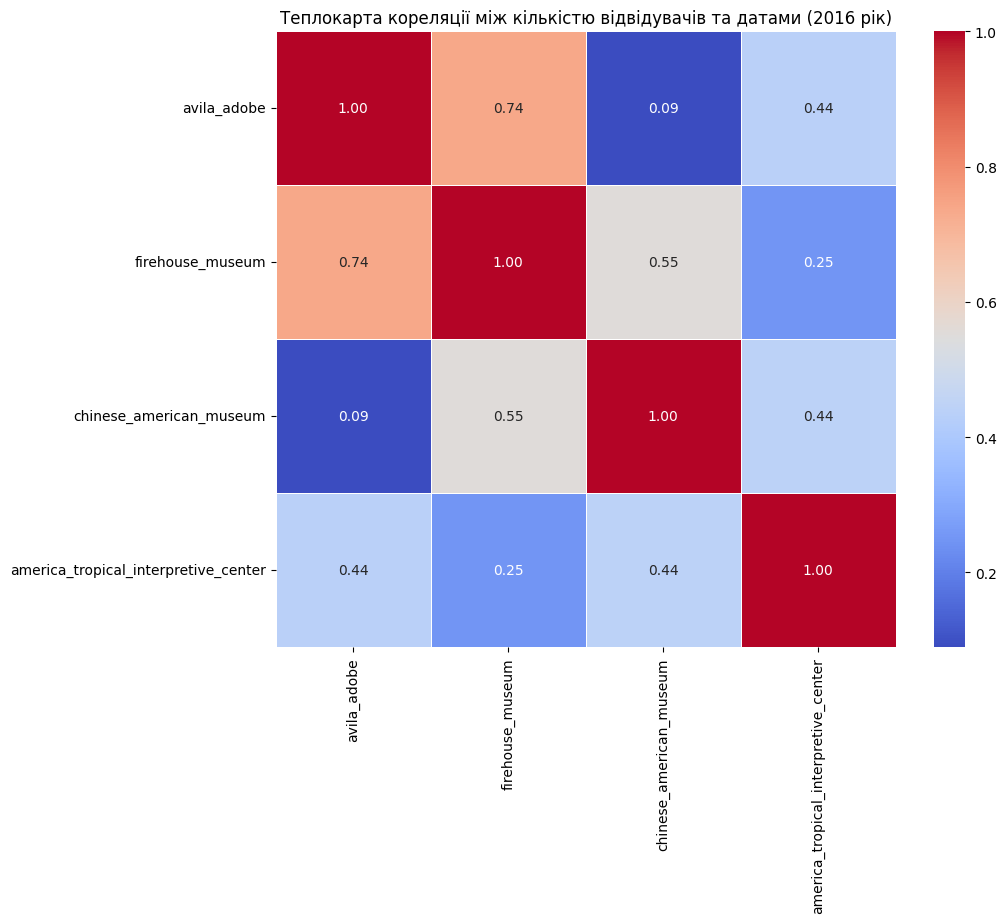

In [67]:
#12 12.	Побудувати теплокарту кореляції для попереднього завдання.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5,
            fmt='.2f')
plt.title('Теплокарта кореляції між кількістю відвідувачів та датами (2016 рік)')
plt.show()

In [68]:
#13 13.	Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.

# Розділимо стовпець "date" на окремі частини
df['Year'] = pd.to_datetime(df['date']).dt.year

# Відфільтруємо дані за 2017 рік
data_2017 = df[df['Year'] == 2017]

# Виберемо стовпці з кількістю відвідувачів для кожного музею
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum',
                  'america_tropical_interpretive_center']
museum_data = data_2017[museum_columns]

# Визначимо дати як індекс для графіку
dates = pd.to_datetime(data_2017['date'])


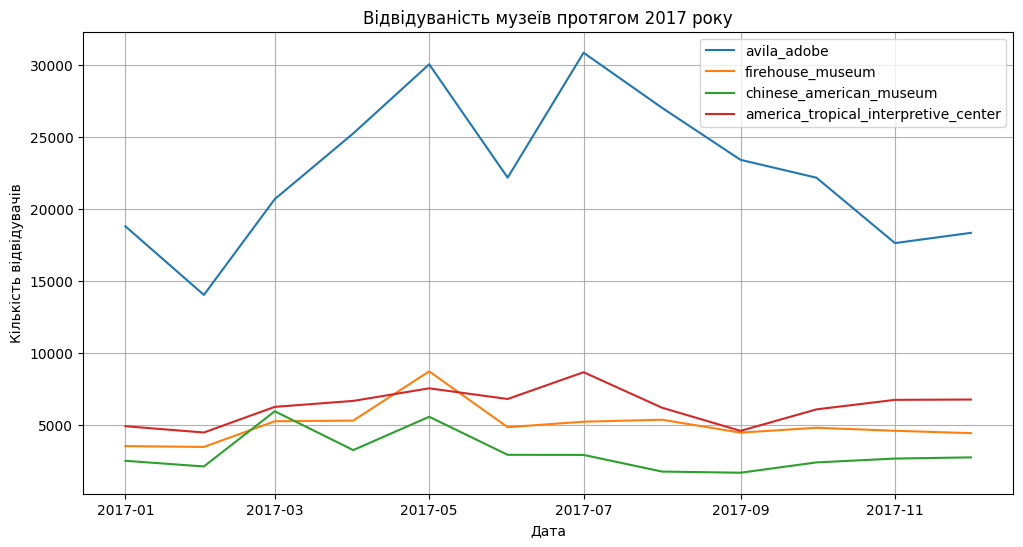

In [69]:
# Побудуємо графік ліній для кожного музею
plt.figure(figsize=(12, 6))
for museum in museum_columns:
    plt.plot(dates, museum_data[museum], label=museum)

plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.title('Відвідуваність музеїв протягом 2017 року')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
#14 14.	Побудувати графіки розсіювання для кожного музею за 2018 рік

# Розділимо стовпець "date" на окремі частини
df['Year'] = pd.to_datetime(df['date']).dt.year

# Відфільтруємо дані за 2017 рік
data_2018 = df[df['Year'] == 2018]

# Виберемо стовпці з кількістю відвідувачів для кожного музею
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum',
                  'america_tropical_interpretive_center']
museum_data = data_2018[museum_columns]

# Визначимо дати як індекс для графіку
dates = pd.to_datetime(data_2018['date'])

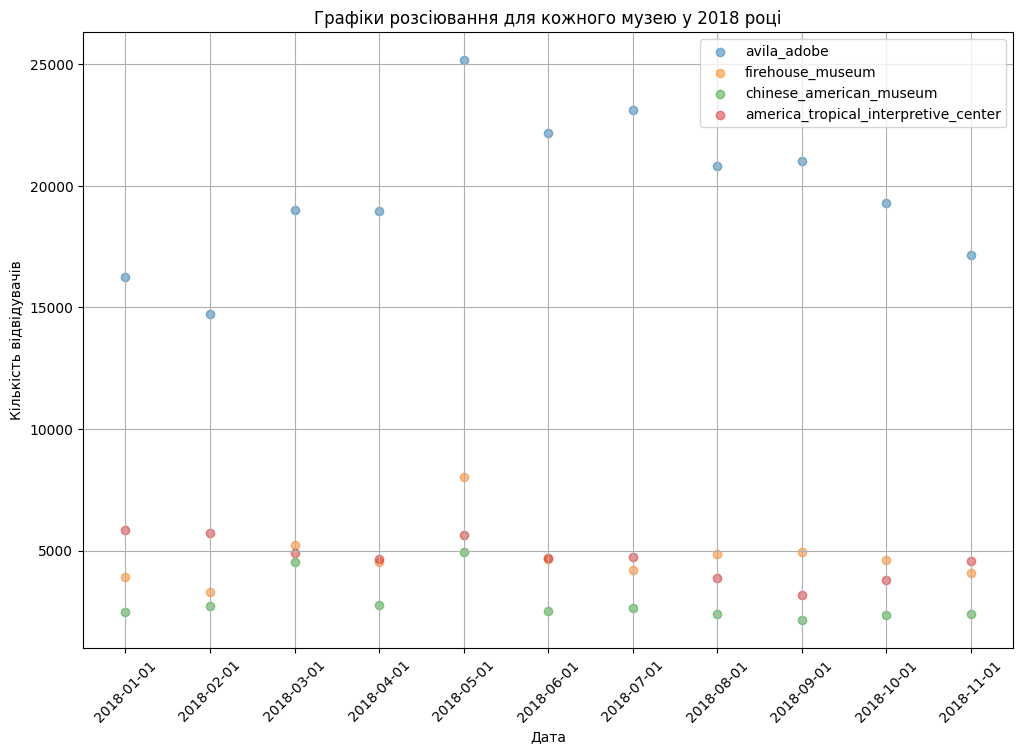

In [71]:
# Побудуємо графіки розсіювання для кожного музею
plt.figure(figsize=(12, 8))
for museum in museum_columns:
    plt.scatter(data_2018['date'], museum_data[museum], label=museum, alpha=0.5)

plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.title('Графіки розсіювання для кожного музею у 2018 році')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

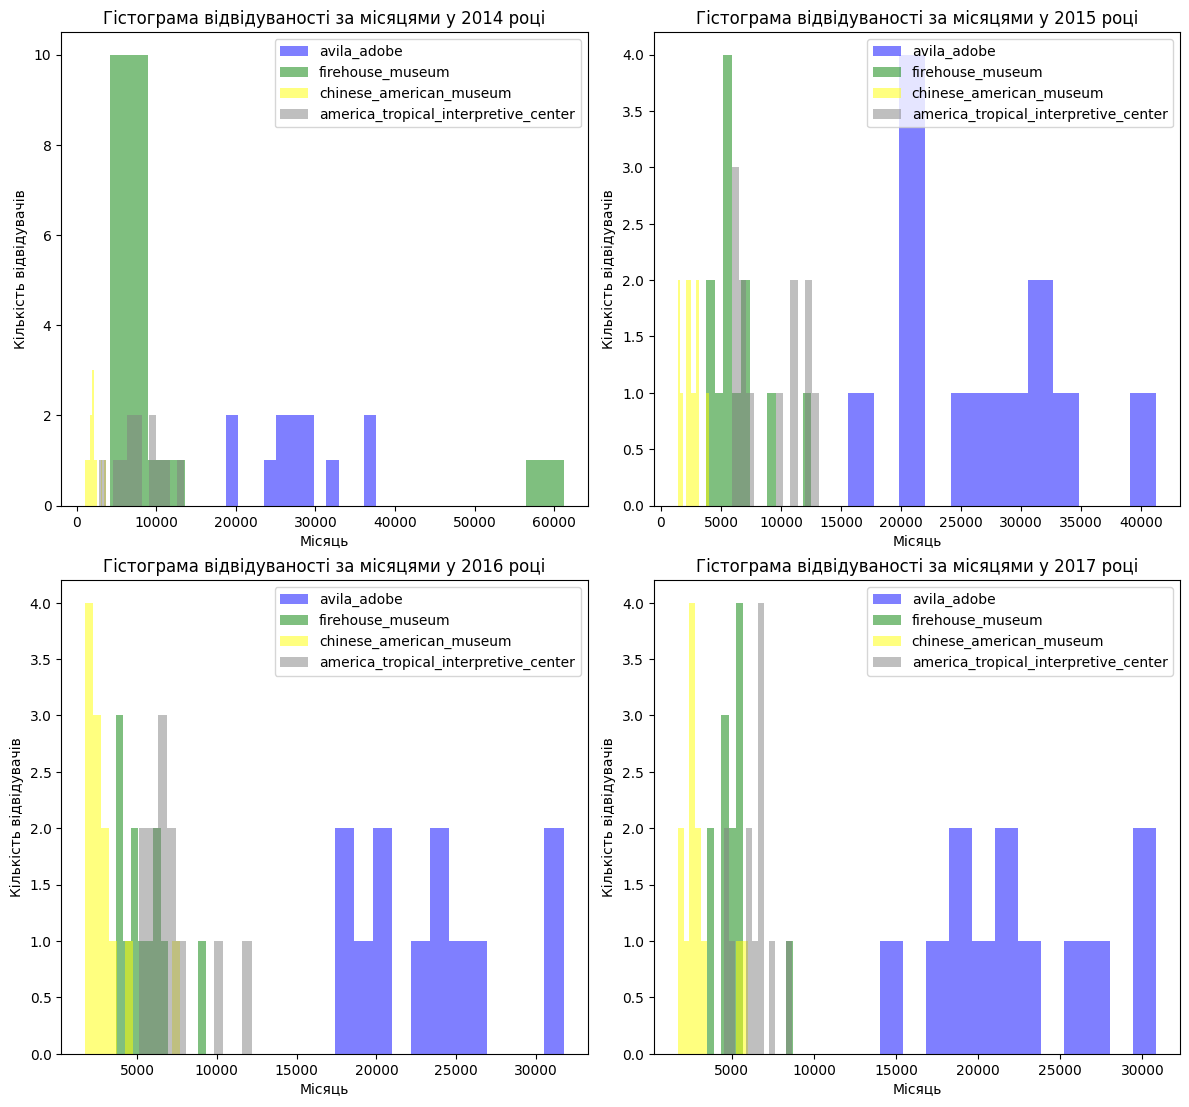

In [72]:
#15 15.	Гістограма відвідуваності за місяцями кожного музею.
#Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки.
#Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.

# Розділимо стовпець "date" на окремі частини
df['Year'] = pd.to_datetime(df['date']).dt.year
df['Month'] = pd.to_datetime(df['date']).dt.month

# Виберемо роки для аналізу
years = [2014, 2015, 2016, 2017]

# Виберемо стовпці з кількістю відвідувачів для кожного музею
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum',
                  'america_tropical_interpretive_center']

# Кольори для графіків
colors = ['blue', 'green', 'yellow', 'grey']

# Розміщення графіків
plt.figure(figsize=(12, 12))

for i, year in enumerate(years):
    plt.subplot(2, 2, i + 1)
    for j, museum in enumerate(museum_columns):
        data_year = df[(df['Year'] == year) & (df['Month'] >= 1) & (df['Month'] <= 12)]
        plt.hist(data_year[museum], bins=12, alpha=0.5, color=colors[j], label=museum)
    plt.title(f'Гістограма відвідуваності за місяцями у {year} році')
    plt.xlabel('Місяць')
    plt.ylabel('Кількість відвідувачів')
    plt.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()



# **ВИСНОВКИ**

**У даній лабораторній роботі, ми:**


1.   Детальніше ознайомились з роботою бібліотекою для аналізу даних pandas
     та бібліотеками для графічного зображення - matplotlib & seaborn
2.   У процесі завдання було розглянуто дані відвідуваності декількох
     музеїв за 2014-2018 роки, підготовлено датасет для подальшої роботи;
3.   Було використано наступні види графічного зображення:
     теплокарта кореляції даних, графік розсіювання і графік ліній та гістограма
4.   Для завантаження датасету було використано допоміжну бібліотеку files;
     усі етапи виконання завдання супроводжено коментарями.

